**Table of Contents**

**Instructions**
**About the Dataset**
  
- Module 1: Importing Data
- Module 2: Data Wrangling
- Module 3: Exploratory Data Analysis
- Module 4: Model Development
- Module 5: Model Evaluation and Refinement

**Instructions**
  
In this assignment, you are a Data Analyst working at a Real Estate Investment Trust. The Trust would like to start investing in Residential real estate. 
You are tasked with determining the market price of a house given a set of features. You will analyze and predict housing prices using attributes or features such as square footage, number of bedrooms, number of floors, and so on. This is a template notebook; your job is to complete the ten questions. Some hints to the questions are given.

As you are completing this notebook, take and save the screenshots of the final outputs of your solutions (e.g., final charts, tables, calculation results etc.).
They will need to be shared in the following Peer Review section of the Final Project module.

In [ ]:
About the Dataset
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from here. It was also slightly modified for the purposes of this course. 



In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [5]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [6]:
df = pd.read_csv(filepath)

In [7]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Question 1**

Display the data types of each column using the function dtypes. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [9]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

**We use the method describe to obtain a statistical summary of the dataframe.**



In [11]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


**Module 2: Data Wrangling**
Data wrangling is the process of transforming raw data into a more structured format. The process includes collecting, processing, analyzing, and tidying the raw data so that it can be easily read and analyzed.

**Question 2**

  Drop the columns **"id"** and **"Unnamed: 0"** from axis 1 using the method **drop()**, then use the method **describe()** 
to obtain a statistical summary of the data. Make sure the **inplace** parameter is set to **True.** Take a screenshot of your code and output.
You will need to submit the screenshot for the final project.

In [8]:

import pandas as pd

# Use the correct file path from the lab instructions
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

# Load the data into a DataFrame
df = pd.read_csv(filepath)

# Drop the specified columns
df.drop(['id', 'Unnamed: 0'], axis='columns', inplace=True)

# Get a statistical summary of the data
summary = df.describe()

# Display the summary
print(summary)

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

We can see we have missing values for the columns **bedrooms** and  **bathrooms** 



In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())


number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column **'bedrooms'** with the mean of the column **'bedrooms'**  using the method **replace().**
Don't forget to set the **inplace** parameter to True



In [26]:
import numpy as np

# Calculate the mean of the 'bedrooms' column
mean_bedrooms = df['bedrooms'].mean()

# Replace NaN values in the 'bedrooms' column with the mean
df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)

C:\Users\EWESIT\AppData\Local\Temp\ipykernel_11228\1094090046.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].replace(np.nan, mean_bedrooms, inplace=True)


In [22]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 10


**Module 3: Exploratory Data Analysis**


**Question 3**

Use the method **value_counts** to count the number of houses with unique floor values, use the method **.to_frame()** to convert it to a data frame. Take a screenshot of your code and output. You will need to submit the screenshot for the final project.

In [31]:
# Count the number of houses with unique floor values
floor_counts = df['floors'].value_counts()

# Convert the result to a DataFrame
floor_counts_df = floor_counts.to_frame()

# Display the DataFrame
print(floor_counts_df)

        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


**Question 4**
  
Use the function **boxplot** in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.
Take a screenshot of your code and boxplot. You will need to submit the screenshot for the final project.

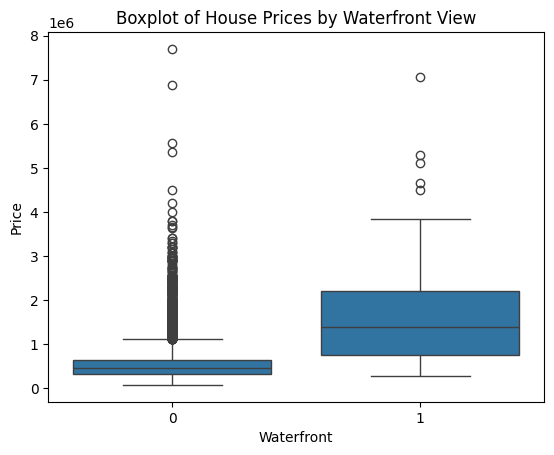

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to compare price outliers for houses with and without a waterfront view
sns.boxplot(x='waterfront', y='price', data=df)

# Display the plot
plt.title('Boxplot of House Prices by Waterfront View')
plt.xlabel('Waterfront')
plt.ylabel('Price')
plt.show()

**Question 5**

  Use the function **regplot** in the seaborn library to determine if the feature **sqft_above** is negatively or positively correlated with price. Take a screenshot of your code and scatterplot. 
You will need to submit the screenshot for the final project.

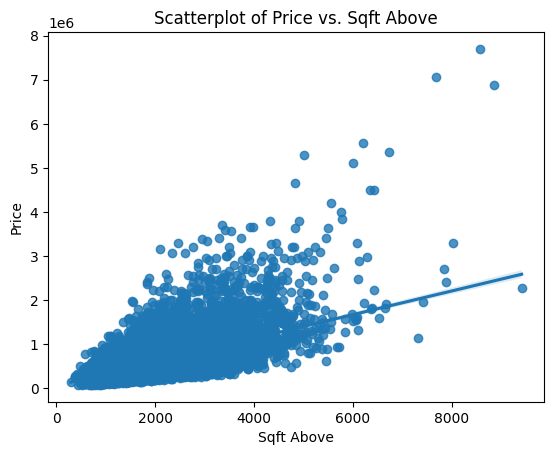

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatterplot with a regression line to examine the correlation between sqft_above and price
sns.regplot(x='sqft_above', y='price', data=df)

# Display the plot
plt.title('Scatterplot of Price vs. Sqft Above')
plt.xlabel('Sqft Above')
plt.ylabel('Price')
plt.show()

We can use the Pandas method **corr()** to find the feature other than price that is most correlated with price.



In [10]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Get the correlation values for 'price' and sort them
price_correlation = correlation_matrix['price'].sort_values(ascending=False)

# Display the feature most correlated with 'price' other than 'price' itself
most_correlated_feature = price_correlation.index[1]  # The first index is 'price' itself
most_correlated_value = price_correlation[1]

print(f"The feature most correlated with 'price' is '{most_correlated_feature}' with a correlation of {most_correlated_value:.2f}.")

The feature most correlated with 'price' is 'sqft_living' with a correlation of 0.70.


C:\Users\EWESIT\AppData\Local\Temp\ipykernel_4788\1894477409.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  most_correlated_value = price_correlation[1]


**Module 4: Model Development**
    
We can Fit a linear regression model using the longitude feature 'long' and caculate the R^2.

In [4]:
import numpy as np
import pandas as pd

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
# Load the data into a DataFrame
df = pd.read_csv(filepath)

# Assuming df is your DataFrame and it's already loaded
# Define the feature and target variable
X = df[['long']].values  # Feature
y = df['price'].values   # Target variable

# Add a column of ones to X to account for the intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict the target variable
y_pred = X @ coefficients

# Calculate the R² value
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"The R² value of the model is: {r2:.2f}")

The R² value of the model is: 0.00


**Question 6**

Fit a linear regression model to predict the **'price'** using the feature **'sqft_living'** then calculate the R^2. 
Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [7]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Define the feature and target variable
X = df[['sqft_living']].values  # Feature
y = df['price'].values          # Target variable

# Add a column of ones to X to account for the intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict the target variable
y_pred = X @ coefficients

# Calculate the R² value
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"The R² value of the model is: {r2:.2f}")

The R² value of the model is: 0.49


**Question 7**

Fit a linear regression model to predict the 'price' using the list of features:



In [23]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     

Then calculate the R^2. Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [25]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
# Define the list of features you want to use
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Extract the features and target variable
X = df[features].values  # Features
y = df['price'].values   # Target variable

# Add a column of ones to X to account for the intercept
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Calculate the coefficients using the normal equation
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y

# Predict the target variable
y_pred = X @ coefficients

# Calculate the R² value
ss_total = np.sum((y - np.mean(y))**2)
ss_residual = np.sum((y - y_pred)**2)
r2 = 1 - (ss_residual / ss_total)

print(f"The R² value of the model is: {r2:.2f}")

The R² value of the model is: nan


**This will help with Question 8**

Create a list of tuples, the first element in the tuple contains the name of the estimator:

**'scale'**

**'polynomial'**

**'model'**

The second element in the tuple contains the model constructor

**StandardScaler()**

**PolynomialFeatures(include_bias=False)**

**LinearRegression()**

In [34]:
# Create a list of tuples with placeholder strings
estimators = [
    ('scale', 'StandardScaler()'),
    ('polynomial', 'PolynomialFeatures(include_bias=False)'),
    ('model', 'LinearRegression()')
]

# Print the list of tuples
print(estimators)

[('scale', 'StandardScaler()'), ('polynomial', 'PolynomialFeatures(include_bias=False)'), ('model', 'LinearRegression()')]


**Question 8**

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list features, and calculate the R^2.
Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [ ]:
!pip uninstall scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming df is your DataFrame and it's already loaded
# Define the list of features you want to use
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Extract the features and target variable
X = df[features].values  # Features
y = df['price'].values   # Target variable

# Create a pipeline
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Predict the target variable
y_pred = pipeline.predict(X)

# Calculate the R² value
r2 = r2_score(y, y_pred)

print(f"The R² value of the model is: {r2:.2f}")

**Module 5: Model Evaluation and Refinement**

Import the necessary modules:

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

We will split the data into training and testing sets:

In [ ]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

**Question 9**

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data. 
Take a screenshot of your code and the value of the R^2. You will need to submit it for the final project.

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and it's already loaded
# Define the list of features you want to use
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Extract the features and target variable
X = df[features].values  # Features
y = df['price'].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Predict the target variable using the test data
y_pred = ridge_model.predict(X_test)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

print(f"The R² value of the Ridge regression model is: {r2:.2f}")

**Question 10**

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. 
Take a screenshot of your code and the R^2. You will need to submit it for the final project.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and it's already loaded
# Define the list of features you want to use
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Extract the features and target variable
X = df[features].values  # Features
y = df['price'].values   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform a second order polynomial transform
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Predict the target variable using the test data
y_pred = ridge_model.predict(X_test_poly)

# Calculate the R² value
r2 = r2_score(y_test, y_pred)

print(f"The R² value of the Ridge regression model with polynomial features is: {r2:.2f}")

Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.



This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section.